### Analysis of Solar Power Adoption Potential for Economic Empowerment

Author: Saachi Sahni

Final Project: CMSC320 (Data Science), Professor Mohammad Nayeem Teli, Fall 2021

Process: data curation, parsing, and management; exploratory data analysis; hypothesis testing and machine learning to provide analysis; and then the curation of a message or messages covering insights learned during the tutorial

### **Data Collection**

I am using 3 datasets with 3 different data collection methologies:
1. Google Project Sunroof data - Google Cloud BigQuery API
2. Electricity data - csv to dictionary conversion
3. Solar panel cost by state - data scraping

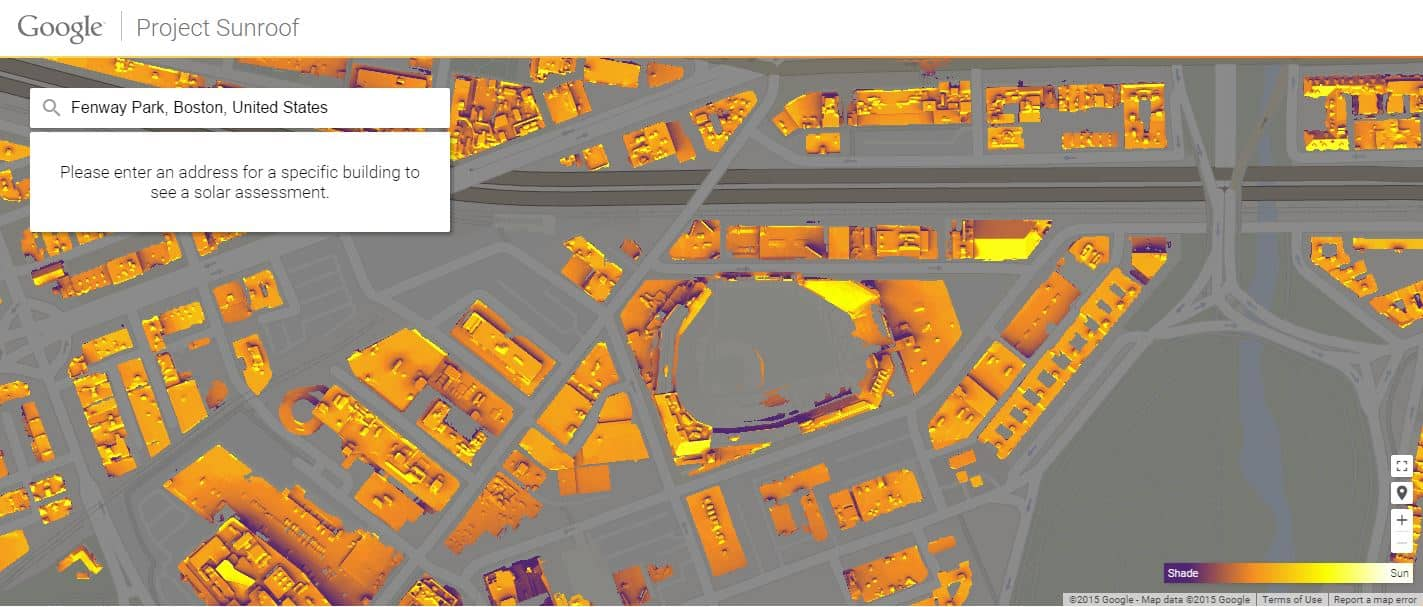

[Google Project Sunroof](https://www.google.com/get/sunroof)

[Google BigQuery Dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=sunroof_solar%3Futm_source%3Dbqux&utm_medium=link&utm_campaign=beta&_ga=2.56157931.-1341270585.1527889006&page=dataset&project=final-project-cmsc320)

The Google Project Sunroof dataset computes how much sunlight hits your roof in a year, using the following:

*   Google's database of imagery and maps
*   3D modeling of your roof
*   Shadows cast by nearby structures and trees
*   All possible sun positions over the course of a year
*   Historical cloud and temperature patterns that might affect solar energy production


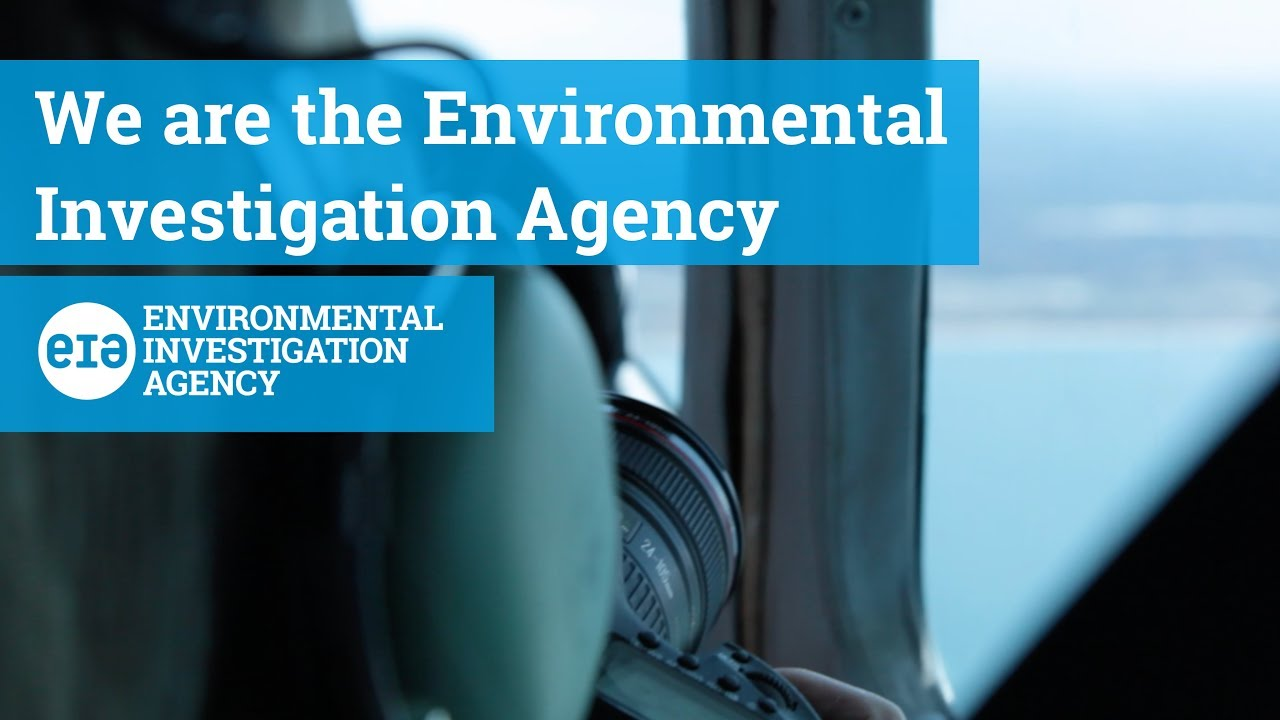

[EIA Dataset](https://www.eia.gov/electricity/sales_revenue_price/)

The U.S. Energy Information Administration dataset includes the class of ownership, number of consumers, sales, revenue, and average retail price by state and utility for electricity.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving eia - residential average monthly bill - Sheet1.csv to eia - residential average monthly bill - Sheet1.csv


In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud import bigquery_storage_v1beta1

# service account key file 
key_path = "final-project-cmsc320-1a7f46a09df6.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)
bqstorage_client = bigquery_storage_v1beta1.BigQueryStorageClient(
    credentials=credentials
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

# https://cloud.google.com/bigquery/docs/authentication/service-account-file

In [3]:
sql = "SELECT * FROM `bigquery-public-data.sunroof_solar.solar_potential_by_postal_code`"
# Downloading BigQuery data to pandas using the BigQuery Storage API
df_project_sunroof = client.query(sql).to_dataframe(bqstorage_client=bqstorage_client)

print("Number of rows: ", df_project_sunroof[df_project_sunroof.columns[0]].count())

print("Column names:")
for col in df_project_sunroof.columns:
    print(col)

# https://cloud.google.com/bigquery/docs/bigquery-storage-python-pandas

Number of rows:  11516
Column names:
region_name
state_name
lat_max
lat_min
lng_max
lng_min
lat_avg
lng_avg
yearly_sunlight_kwh_kw_threshold_avg
count_qualified
percent_covered
percent_qualified
number_of_panels_n
number_of_panels_s
number_of_panels_e
number_of_panels_w
number_of_panels_f
number_of_panels_median
number_of_panels_total
kw_median
kw_total
yearly_sunlight_kwh_n
yearly_sunlight_kwh_s
yearly_sunlight_kwh_e
yearly_sunlight_kwh_w
yearly_sunlight_kwh_f
yearly_sunlight_kwh_median
yearly_sunlight_kwh_total
install_size_kw_buckets
carbon_offset_metric_tons
existing_installs_count
center_point


In [4]:
df_project_sunroof

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
0,20303,District of Columbia,38.876371,38.874446,-77.003766,-77.005605,38.875346,-77.004523,1037.00,0,33.333333,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,None,0.000000,0,POINT(-77.0045229333333 38.8753456)
1,21532,Maryland,39.722246,39.569701,-78.860691,-79.091712,39.651014,-78.930906,971.55,0,0.020812,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,None,0.000000,0,POINT(-78.9309058462436 39.6510141030593)
2,24069,Virginia,36.655149,36.541640,-79.509898,-79.702540,36.598786,-79.640503,1068.45,0,0.090253,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,None,0.000000,0,POINT(-79.6405031730145 36.5987864088448)
3,24724,West Virginia,37.359420,37.327022,-81.282143,-81.338330,37.331934,-81.314917,1028.50,0,62.500000,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,None,0.000000,0,POINT(-81.3149169875 37.331933825)
4,28357,North Carolina,34.961358,34.857796,-79.003998,-79.160387,34.916952,-79.081624,1095.65,0,0.086133,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,None,0.000000,0,POINT(-79.0816239424634 34.9169522628768)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,18025,Pennsylvania,40.632602,40.631640,-75.390448,-75.394455,40.632179,-75.392770,980.05,5,100.000000,100.000000,0,0,0,0,9637,794.0,9637.0,198.50,2409.25,0.000000,0.000000,0.000000,0.000000,2.719113e+06,223869.943237,2.719113e+06,"[[50,1],[110,1],[195,1],[915,1],[1125,1]]",1727.889413,0,POINT(-75.39277012 40.6321787)
11512,91182,California,34.149359,34.148787,-118.140291,-118.141023,34.148964,-118.140715,1405.05,5,100.000000,83.333333,0,303,67,100,578,135.0,1048.0,33.75,262.00,0.000000,121202.463721,23272.988171,34209.874878,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,POINT(-118.140715083333 34.148964)
11513,90261,California,33.896309,33.895752,-118.376801,-118.378354,33.896162,-118.377547,1405.05,5,100.000000,100.000000,53,329,165,242,1602,207.0,2391.0,51.75,597.75,18415.250519,129557.577319,60402.787781,90146.549121,5.689299e+05,77859.660291,8.674520e+05,"[[45,2],[50,1],[55,1],[390,1]]",236.494332,0,POINT(-118.37754686 33.89616182)
11514,28281,North Carolina,35.226916,35.226038,-80.844785,-80.845823,35.226438,-80.845268,1091.40,5,100.000000,83.333333,6,21,20,49,1706,318.0,1802.0,79.50,450.50,1585.371503,6776.846112,5439.027979,15637.955621,5.071857e+05,99568.464185,5.366249e+05,"[[65,2],[75,1],[100,1],[130,1]]",315.023759,0,POINT(-80.8452678 35.2264376833333)


In [73]:
import pandas as pd
df_eia = pd.read_csv('eia - residential average monthly bill - Sheet1.csv', lineterminator='\n')
df_eia

,State,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents)\r
0,New England,"6,447,975",625,21.25,132.71
1,Connecticut,"1,521,112",711,22.71,161.55
2,Maine,"717,559",570,16.81,95.77
3,Massachusetts,"2,817,549",602,21.97,132.18
4,New Hampshire,"633,234",630,19.04,120.01
...,...,...,...,...,...
57,Washington,"3,168,238",969,9.87,95.72
58,Pacific Noncontiguous,"757,210",543,27.02,146.84
59,Alaska,"315,208",552,22.57,124.66
60,Hawaii,"442,002",537,30.28,162.66


In [9]:
import requests
from bs4 import BeautifulSoup

# Use requests to get (as in, HTTP GET) the URL
headers = {
    'User-Agent': 'My User Agent 1.0'
}

r = requests.get('https://www.consumeraffairs.com/solar-energy/how-much-do-solar-panels-cost.html', headers = headers)

In [144]:
# Extract the text from the page
# Use BeautifulSoup to read and parse the data, either as html or lxml
page_content = BeautifulSoup(r.content, 'html.parser')
# Use prettify() to view the content and find the appropriate table
#page_content.prettify()

In [11]:
# Use find() to save the aforementioned table as a variable
table = page_content.find("table")
# Use pandas to read in the HTML file.
pd_table = pd.read_html(str(table), flavor="bs4")
table_scraped = pd.concat(pd_table)
table_scraped.columns = ['State', '6 KW System', 'Average Cost Per Watt ($/W)', '26% Federal Tax Credit', '22% Federal Tax Credit']
table_scraped

,State,6 KW System,Average Cost Per Watt ($/W),26% Federal Tax Credit,22% Federal Tax Credit
0,Alabama,"$13,706",$2.45,"$3,564","$3,015"
1,Alaska,"$13,454",$2.41,"$3,498","$2,960"
2,Arizona,"$13,680",$2.67,"$3,557","$3,010"
3,Arkansas,"$14,713",$2.63,"$3,825","$3,237"
4,California,"$15,240",$2.68,"$3,962","$3,353"
5,Colorado,"$17,100",$2.44,"$4,446","$3,762"
6,Connecticut,"$15,540",$2.86,"$4,040","$3,419"
7,District of Columbia,"$15,720",$2.88,"$4,087","$3,458"
8,Delaware,"$15,300",$2.65,"$3,978","$3,366"
9,Florida,"$13,920",$2.41,"$3,619","$3,062"


### **Data Processing**

Although Google's Project Sunroof data includes zipcodes from 69 regions, I only kept data from 51 including the 50 states and District of Columbia because these correspond with the U.S. Energy Information Administration's data which only matches with those regions. I removed the additional columns from the dataframe based on the state_name row value. 

In [12]:
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Corozal']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Baja California']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Canóvanas']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Dorado']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Toa Baja']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Trujillo Alto']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Arecibo']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Hormigueros']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Moca']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Toa Alta']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Ponce']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Bayamón']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Guaynabo']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Cataño']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Aguadilla']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Mayagüez']
df_project_sunroof = df_project_sunroof[df_project_sunroof != 'Carolina']

In [13]:
display(df_project_sunroof['state_name'].value_counts())

California              1212
Texas                    815
New York                 778
Florida                  749
Pennsylvania             599
New Jersey               478
Ohio                     473
Illinois                 462
Michigan                 370
Massachusetts            330
North Carolina           311
Georgia                  286
Washington               259
Alabama                  252
Virginia                 249
Indiana                  237
Tennessee                218
Wisconsin                216
Missouri                 215
Connecticut              200
Arizona                  196
Minnesota                195
Colorado                 193
South Carolina           189
Louisiana                177
Maryland                 167
Oklahoma                 137
Oregon                   124
Kansas                   124
Kentucky                 111
Iowa                     111
Utah                     109
Arkansas                  90
Nevada                    84
Nebraska      

Similarly, the U.S. Energy Information Administration's data includes the 50 states and the District of Columbia, as well as 11 larger regions that these are grouped into and their total. I dropped these larger regions and from the dataframe.

In [76]:
df_eia = df_eia.drop([0, 7, 11, 17, 25, 35, 40, 45, 50, 54, 58, 61]) 

In [74]:
df_eia

,State,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents)\r
0,New England,"6,447,975",625,21.25,132.71
1,Connecticut,"1,521,112",711,22.71,161.55
2,Maine,"717,559",570,16.81,95.77
3,Massachusetts,"2,817,549",602,21.97,132.18
4,New Hampshire,"633,234",630,19.04,120.01
...,...,...,...,...,...
57,Washington,"3,168,238",969,9.87,95.72
58,Pacific Noncontiguous,"757,210",543,27.02,146.84
59,Alaska,"315,208",552,22.57,124.66
60,Hawaii,"442,002",537,30.28,162.66


I replaced special characters so the values can be used as numbers.

In [142]:
df_eia = df_eia.replace(',','', regex=True)
df_eia = df_eia.replace('$','', regex=True)

In [143]:
table_scraped = table_scraped.replace(',','', regex=True)
table_scraped = table_scraped.replace('$','', regex=True)

In [98]:
df_eia

,state_name,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents)\r
1,Connecticut,1521112,711,22.71,161.55
2,Maine,717559,570,16.81,95.77
3,Massachusetts,2817549,602,21.97,132.18
4,New Hampshire,633234,630,19.04,120.01
5,Rhode Island,441573,594,22.01,130.75
6,Vermont,316948,567,19.54,110.79
8,New Jersey,3618587,683,16.03,109.54
9,New York,7239162,602,18.36,110.47
10,Pennsylvania,5448109,846,13.58,114.90
12,Illinois,5339610,721,13.04,93.98


Since Google's Project Sunroof dataset is too large to display and scan by eye, I checked for any null values in the data. There are 19 rows with null values for 7 categories, including number_of_panels_total, yearly_sunlight_kwh_total, and kw_total which I use for my analysis. Since these 19 zipcodes only correspond to 0.165% of the zipcode regions, I chose to simply drop these rows.

In [40]:
count_nan = df_project_sunroof.isnull().sum()
print('Count of NaN: ')
print(str(count_nan))

print("")
print("19/11516 = ", (19/11516), "* 100 =")
a = ((19/11516)*100)
print("%.3f" % a, "%")
print("")

is_NaN = df_project_sunroof.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_project_sunroof[row_has_NaN]
print(rows_with_NaN[['region_name', 'state_name']])

df_project_sunroof = df_project_sunroof.dropna()

Count of NaN: 
region_name                              0
state_name                              47
lat_max                                  0
lat_min                                  0
lng_max                                  0
lng_min                                  0
lat_avg                                  0
lng_avg                                  0
yearly_sunlight_kwh_kw_threshold_avg     0
count_qualified                          0
percent_covered                          0
percent_qualified                        0
number_of_panels_n                       0
number_of_panels_s                       0
number_of_panels_e                       0
number_of_panels_w                       0
number_of_panels_f                       0
number_of_panels_median                 19
number_of_panels_total                  19
kw_median                               19
kw_total                                19
yearly_sunlight_kwh_n                    0
yearly_sunlight_kwh_s                  

Finally, I combined these 3 datatables to get one master table. I am merging them based on the value of "state_name", so I need to make sure that is the column name in each of the original dataframes.

In [99]:
df_eia

,state_name,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents)\r
1,Connecticut,1521112,711,22.71,161.55
2,Maine,717559,570,16.81,95.77
3,Massachusetts,2817549,602,21.97,132.18
4,New Hampshire,633234,630,19.04,120.01
5,Rhode Island,441573,594,22.01,130.75
6,Vermont,316948,567,19.54,110.79
8,New Jersey,3618587,683,16.03,109.54
9,New York,7239162,602,18.36,110.47
10,Pennsylvania,5448109,846,13.58,114.90
12,Illinois,5339610,721,13.04,93.98


In [100]:
table_scraped.rename(columns={'State':'state_name'}, inplace=True)
df_eia.rename(columns={'State':'state_name'}, inplace=True)

In [138]:
data_master = pd.merge(df_project_sunroof, table_scraped, on="state_name")
data_master = pd.merge(data_master, df_eia, on="state_name")
data_master

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,Average Cost Per Watt (/W),Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents)\r
0,19149,Pennsylvania,40.051229,40.026879,-75.041355,-75.092596,40.037404,-75.065705,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3.332079e+03,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,POINT(-75.0657051746548 40.0374044403417),2.38,5448109,846.0,13.58,114.90
1,19120,Pennsylvania,40.052709,40.012403,-75.096987,-75.138747,40.034398,-75.120887,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3.572812e+03,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,POINT(-75.120887243506 40.0343982932811),2.38,5448109,846.0,13.58,114.90
2,19132,Pennsylvania,40.005893,39.986358,-75.150639,-75.190697,39.995681,-75.169645,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3.379916e+03,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,POINT(-75.169645159245 39.9956814907579),2.38,5448109,846.0,13.58,114.90
3,19134,Pennsylvania,40.007334,39.977417,-75.087213,-75.131005,39.992451,-75.111935,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3.582464e+03,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,POINT(-75.1119347717865 39.9924510629131),2.38,5448109,846.0,13.58,114.90
4,19138,Pennsylvania,40.071452,40.039948,-75.147013,-75.176449,40.056627,-75.156949,997.90,4256,93.056346,37.186544,2417,6650,5865,2916,100013,12.0,117861.0,3.00,29465.25,6.326130e+05,2.038111e+06,1.696291e+06,8.202375e+05,2.960903e+07,3.545397e+03,3.479628e+07,"[[0,3505],[5,529],[10,57],[15,29],[20,12],[25,...",22111.668631,3,POINT(-75.1569492782584 40.0566267715424),2.38,5448109,846.0,13.58,114.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11334,96814,Hawaii,21.305189,21.288241,-157.834973,-157.859447,21.298098,-157.844489,1269.90,1157,98.842975,96.739130,14476,17512,15208,14947,192783,98.0,254926.0,24.50,63731.50,5.140616e+06,7.019367e+06,5.769696e+06,5.664112e+06,7.621990e+07,3.863250e+04,9.981369e+07,"[[0,60],[5,128],[10,158],[15,137],[20,94],[25,...",66561.946235,30,POINT(-157.844489285041 21.2980979208264),2.67,442002,537.0,30.28,162.66
11335,96822,Hawaii,21.333037,21.292892,-157.794804,-157.848293,21.310937,-157.818053,1269.90,6601,96.401172,95.514397,72779,99875,85068,88925,274100,67.0,620747.0,16.75,155186.75,2.498985e+07,3.868192e+07,3.073598e+07,3.282966e+07,1.058894e+08,2.472209e+04,2.331269e+08,"[[0,444],[5,1077],[10,1342],[15,1213],[20,906]...",155463.422024,769,POINT(-157.818053244023 21.3109372091226),2.67,442002,537.0,30.28,162.66
11336,96761,Hawaii,21.011006,20.808700,-156.607575,-156.696191,20.920154,-156.672354,1314.95,5347,93.429936,94.236870,99647,116961,102656,113264,117510,71.0,550038.0,17.75,137509.50,3.611358e+07,4.828501e+07,3.900624e+07,4.463285e+07,4.803159e+07,2.776670e+04,2.160693e+08,"[[0,375],[

### **Data Visualization and Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


Text(0.5, 1.0, '% of buildings in Google Maps covered by Project Sunroof')

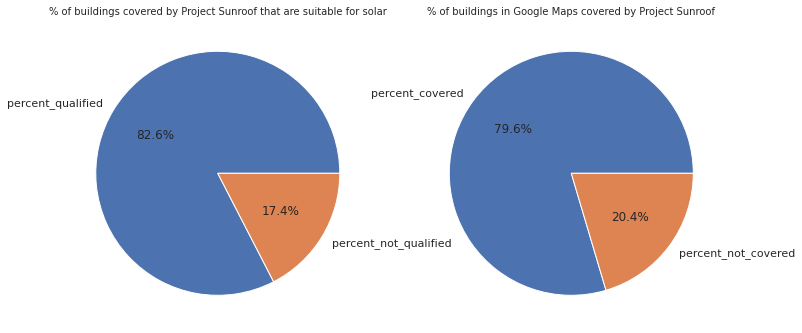

In [102]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
fig.tight_layout() 

#percent_qualified
df_qual = df_project_sunroof.agg(Total_Percent_Qualified = ('percent_qualified', 'mean'))
df_qual = df_qual['percent_qualified']/100
df_qual = df_qual.to_frame()
df_qual.insert(1, "percent_not_qualified", (1 - df_qual['percent_qualified']), allow_duplicates=True)
labels1 = ['percent_qualified', 'percent_not_qualified']
ax1.pie(df_qual, labels=labels1, autopct = '%1.1f%%')
ax1.set_title("% of buildings covered by Project Sunroof that are suitable for solar", fontsize=10)

#percent_covered
df_cov = df_project_sunroof.agg(Total_Percent_Covered = ('percent_covered', 'mean'))
df_cov = df_cov['percent_covered']/100
df_cov = df_cov.to_frame()
df_cov.insert(1, "percent_not_covered", (1 - df_cov['percent_covered']), allow_duplicates=True)
labels2 = ['percent_covered', 'percent_not_covered']
ax2.pie(df_cov, labels=labels2, autopct = '%1.1f%%')
ax2.set_title("% of buildings in Google Maps covered by Project Sunroof", fontsize=10)

Text(0, 0.5, 'Yearly Sunlight Total (kwh)')

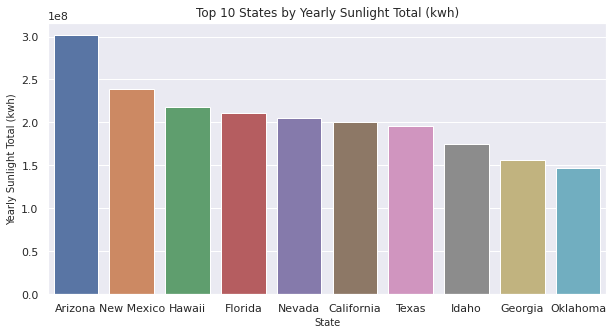

In [84]:
import seaborn as sns

df_yearly_sunlight_agg = df_project_sunroof.groupby('state_name').agg({'yearly_sunlight_kwh_total': 'mean'}).nlargest(10, 'yearly_sunlight_kwh_total',keep='all')

df_yearly_sunlight_agg = df_yearly_sunlight_agg.reset_index(drop=False)

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.barplot(x='state_name', y='yearly_sunlight_kwh_total', data=df_yearly_sunlight_agg)

ax.set_title('Top 10 States by Yearly Sunlight Total (kwh)')
ax.set_xlabel('State', fontsize = 10)
ax.set_ylabel('Yearly Sunlight Total (kwh)', fontsize = 10)


Text(0, 0.5, 'Count Qualified for Solar Power')

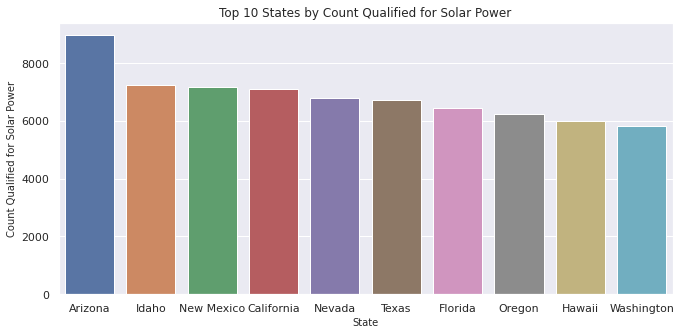

In [85]:
df_count_qualified_agg = df_project_sunroof.groupby('state_name').agg({'count_qualified': 'mean'}).nlargest(10, 'count_qualified', keep='all')

df_count_qualified_agg = df_count_qualified_agg.reset_index(drop=False)

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(11,5)})

ax = sns.barplot(x='state_name', y='count_qualified', data=df_count_qualified_agg)

ax.set_title('Top 10 States by Count Qualified for Solar Power')
ax.set_xlabel('State', fontsize = 10)
ax.set_ylabel('Count Qualified for Solar Power', fontsize = 10)

Text(0, 0.5, 'Total Number of Solar Panels')

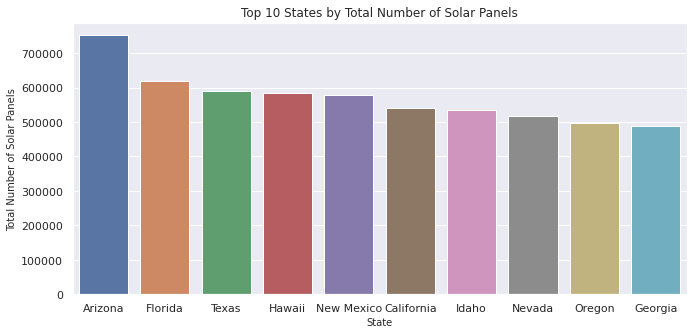

In [86]:
df_total_panels_agg = df_project_sunroof.groupby('state_name').agg({'number_of_panels_total': 'mean'}).nlargest(10, 'number_of_panels_total', keep='all')

df_total_panels_agg = df_total_panels_agg.reset_index(drop=False)

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(11,5)})

ax = sns.barplot(x='state_name', y='number_of_panels_total', data=df_total_panels_agg)

ax.set_title('Top 10 States by Total Number of Solar Panels')
ax.set_xlabel('State', fontsize = 10)
ax.set_ylabel('Total Number of Solar Panels', fontsize = 10)

Text(0, 0.5, 'Carbon Offset (Metric Tons)')

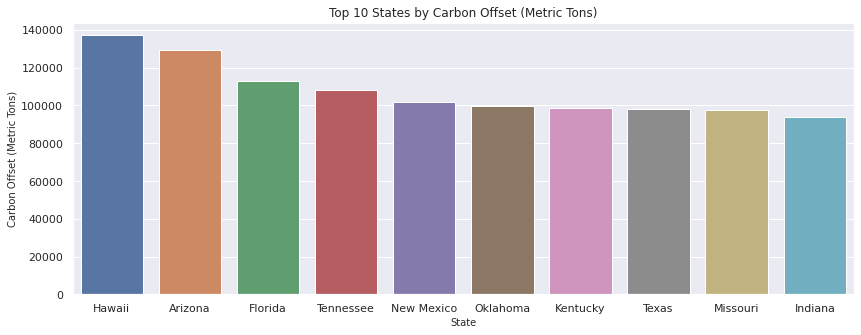

In [87]:
df_carbon_offset_agg = df_project_sunroof.groupby('state_name').agg({'carbon_offset_metric_tons': 'mean'}).nlargest(10, 'carbon_offset_metric_tons', keep='all')

df_carbon_offset_agg = df_carbon_offset_agg.reset_index(drop=False)

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(14,5)})

ax = sns.barplot(x='state_name', y='carbon_offset_metric_tons', data=df_carbon_offset_agg)

ax.set_title('Top 10 States by Carbon Offset (Metric Tons)')
ax.set_xlabel('State', fontsize = 10)
ax.set_ylabel('Carbon Offset (Metric Tons)', fontsize = 10)

Text(0, 0.5, 'Average Monthly Consumption (kWh)')

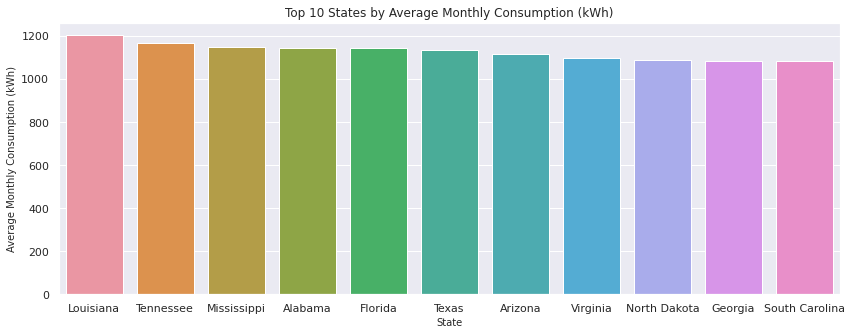

In [113]:
df_eia['Average Monthly Consumption (kWh)'] = pd.to_numeric(df_eia['Average Monthly Consumption (kWh)'], downcast="float")
df_avg_consumption = df_eia.nlargest(10, 'Average Monthly Consumption (kWh)', keep='all')

df_avg_consumption = df_avg_consumption.reset_index(drop=False)

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(14,5)})

ax = sns.barplot(x='state_name', y='Average Monthly Consumption (kWh)', data=df_avg_consumption)

ax.set_title('Top 10 States by Average Monthly Consumption (kWh)')
ax.set_xlabel('State', fontsize = 10)
ax.set_ylabel('Average Monthly Consumption (kWh)', fontsize = 10)

Text(0, 0.5, 'Average Price (cents/kWh)')

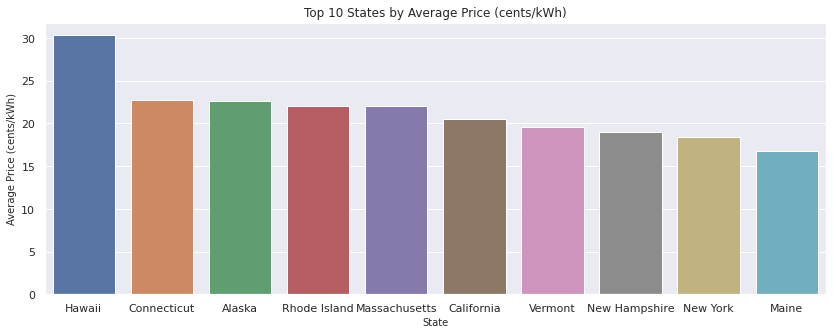

In [108]:
df_avg_price = df_eia.nlargest(10, 'Average Price (cents/kWh)', keep='all')

df_avg_price = df_avg_price.reset_index(drop=False)

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(14,5)})

ax = sns.barplot(x='state_name', y='Average Price (cents/kWh)', data=df_avg_price)

ax.set_title('Top 10 States by Average Price (cents/kWh)')
ax.set_xlabel('State', fontsize = 10)
ax.set_ylabel('Average Price (cents/kWh)', fontsize = 10)

Calculating Return on Investment - ROI is added as the final column and is measured in years

In [139]:
# ((yearly_sunlight_kwh_median/12) * (avg_price_per_watt)/1000) - MONTHS(avg_monthly_consumption * avg_price_cents) = 0
# ((yearly_sunlight_kwh_median/12) * (avg_price_per_watt)/1000) = MONTHS(avg_monthly_consumption * avg_price_cents) 
# MONTHS = (avg_monthly_consumption * avg_price_cents) / ((yearly_sunlight_kwh_median/12) * (avg_price_per_watt)/1000)

#data_master['Average Monthly Consumption (kWh)'] = pd.to_numeric(df_eia['Average Monthly Consumption (kWh)'], downcast="float")
data_master['ROI'] = ((data_master['Average Monthly Consumption (kWh)'])*(data_master['Average Price (cents/kWh)'])/100)/((data_master['yearly_sunlight_kwh_median']/12)*(data_master['Average Cost Per Watt (/W)']/1000))
data_master['ROI'] = (data_master['ROI']/12)
data_master

0        846.0
1        846.0
2        846.0
3        846.0
4        846.0
         ...  
11334    537.0
11335    537.0
11336    537.0
11337    537.0
11338    537.0
Name: Average Monthly Consumption (kWh), Length: 11339, dtype: float32

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,Average Cost Per Watt (/W),Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents)\r,ROI
0,19149,Pennsylvania,40.051229,40.026879,-75.041355,-75.092596,40.037404,-75.065705,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3.332079e+03,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,POINT(-75.0657051746548 40.0374044403417),2.38,5448109,846.0,13.58,114.90,14.486982
1,19120,Pennsylvania,40.052709,40.012403,-75.096987,-75.138747,40.034398,-75.120887,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3.572812e+03,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,POINT(-75.120887243506 40.0343982932811),2.38,5448109,846.0,13.58,114.90,13.510859
2,19132,Pennsylvania,40.005893,39.986358,-75.150639,-75.190697,39.995681,-75.169645,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3.379916e+03,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,POINT(-75.169645159245 39.9956814907579),2.38,5448109,846.0,13.58,114.90,14.281944
3,19134,Pennsylvania,40.007334,39.977417,-75.087213,-75.131005,39.992451,-75.111935,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3.582464e+03,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,POINT(-75.1119347717865 39.9924510629131),2.38,5448109,846.0,13.58,114.90,13.474457
4,19138,Pennsylvania,40.071452,40.039948,-75.147013,-75.176449,40.056627,-75.156949,997.90,4256,93.056346,37.186544,2417,6650,5865,2916,100013,12.0,117861.0,3.00,29465.25,6.326130e+05,2.038111e+06,1.696291e+06,8.202375e+05,2.960903e+07,3.545397e+03,3.479628e+07,"[[0,3505],[5,529],[10,57],[15,29],[20,12],[25,...",22111.668631,3,POINT(-75.1569492782584 40.0566267715424),2.38,5448109,846.0,13.58,114.90,13.615333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11334,96814,Hawaii,21.305189,21.288241,-157.834973,-157.859447,21.298098,-157.844489,1269.90,1157,98.842975,96.739130,14476,17512,15208,14947,192783,98.0,254926.0,24.50,63731.50,5.140616e+06,7.019367e+06,5.769696e+06,5.664112e+06,7.621990e+07,3.863250e+04,9.981369e+07,"[[0,60],[5,128],[10,158],[15,137],[20,94],[25,...",66561.946235,30,POINT(-157.844489285041 21.2980979208264),2.67,442002,537.0,30.28,162.66,1.576399
11335,96822,Hawaii,21.333037,21.292892,-157.794804,-157.848293,21.310937,-157.818053,1269.90,6601,96.401172,95.514397,72779,99875,85068,88925,274100,67.0,620747.0,16.75,155186.75,2.498985e+07,3.868192e+07,3.073598e+07,3.282966e+07,1.058894e+08,2.472209e+04,2.331269e+08,"[[0,444],[5,1077],[10,1342],[15,1213],[20,906]...",155463.422024,769,POINT(-157.818053244023 21.3109372091226),2.67,442002,537.0,30.28,162.66,2.463393
11336,96761,Hawaii,21.011006,20.808700,-156.607575,-156.696191,20.920154,-156.672354,1314.95,5347,93.429936,94.236870,99647,116961,102656,113264,117510,71.0,550038.0,17.75,137509.50,3.611358e+07,4.828501e+07,

Here we see that the Return on Investment for Solar Power Adoption is between 0 and 25 years and varies based on region latitude and longitude.

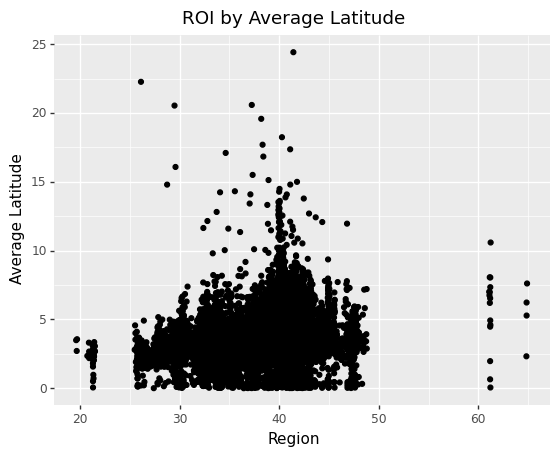

<ggplot: (8777976800333)>

In [140]:
from plotnine import *

ggplot(aes(x='lat_avg', y='ROI'), data=data_master) +\
    geom_point() +\
    labs(title="ROI by Average Latitude",
         x = "Region",
         y = "Average Latitude")

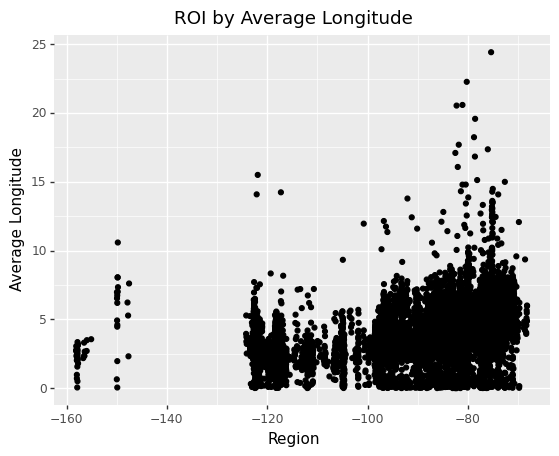

<ggplot: (8777976728761)>

In [141]:
from plotnine import *

ggplot(aes(x='lng_avg', y='ROI'), data=data_master) +\
    geom_point() +\
    labs(title="ROI by Average Longitude",
         x = "Region",
         y = "Average Longitude")

### **Model: Machine Learning, Analysis**

As we move towards a more sustainable future, I will be analyzing what factors most contribute to the total carbon offset generated.  

#### *Total carbon offset they would generate*

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [121]:
df_model_variables = data_master.filter(['count_qualified','percent_qualified',
                                          'number_of_panels_median','number_of_panels_total','kw_median',
                                          'kw_total','yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total',
                                          'carbon_offset_metric_tons','existing_installs_count'
                                        ])

In [122]:
# independent variables
X = data_master[['count_qualified','percent_qualified',
                  'number_of_panels_median','number_of_panels_total','kw_median',
                  'kw_total','yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total',
                  'existing_installs_count']]
# dependent variables
y = data_master[['carbon_offset_metric_tons']]

print(X.shape)
print(y.shape)

# making train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

(11339, 9)
(11339, 1)


In [123]:
# fitting the model
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [124]:
print('Intercept: ', model1.intercept_)

Intercept:  [-637.88591612]


In [125]:
coef = pd.DataFrame(model1.coef_)
coef.columns = X.columns
coef = pd.melt(coef)
coef #printing the coeffecients

,variable,value
0,count_qualified,-1.195695
1,percent_qualified,8.889112
2,number_of_panels_median,-3.271420
3,number_of_panels_total,0.251040
4,kw_median,-0.817855
5,kw_total,0.062760
6,yearly_sunlight_kwh_median,0.011048
7,yearly_sunlight_kwh_total,-0.000227
8,existing_installs_count,-48.999803


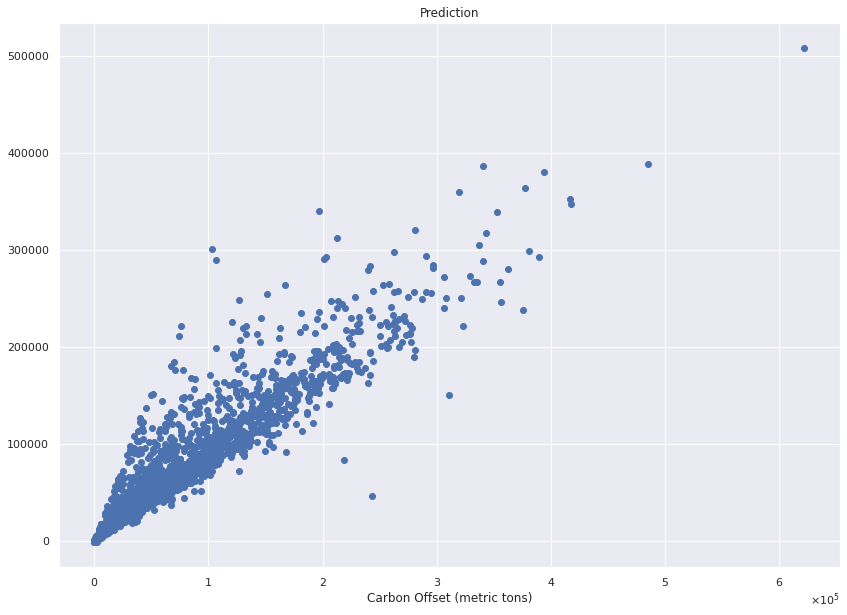

<Figure size 1008x360 with 0 Axes>

In [126]:
predictions = model1.predict(X_test)
plt.figure(figsize=(14,10))
plt.scatter(y_test,predictions)
plt.xlabel('Carbon Offset (metric tons)')
plt.title('Prediction')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
plt.show()
plt.tight_layout()

In [127]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean absolute error: 14778.275073941832
Mean squared error: 657207383.1137999
Root mean squared error: 25636.05630969397


In [128]:
# independent variables
X_new = data_master[['percent_qualified','number_of_panels_total','kw_median',
                  'kw_total', 'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total']]
# dependent variables
y_new = data_master[['carbon_offset_metric_tons']]

print(X.shape)
print(y.shape)

# making train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=101)

(11339, 9)
(11339, 1)


In [129]:
# fitting the model
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [130]:
print('Intercept: ', model2.intercept_)

Intercept:  [423.0841908]


In [131]:
coef = pd.DataFrame(model2.coef_)
coef.columns = X_new.columns
coef = pd.melt(coef)
coef #printing the coeffecients

,variable,value
0,percent_qualified,-20.923788
1,number_of_panels_total,0.283567
2,kw_median,-7.621177
3,kw_total,0.070892
4,yearly_sunlight_kwh_median,0.008598
5,yearly_sunlight_kwh_total,-0.000392


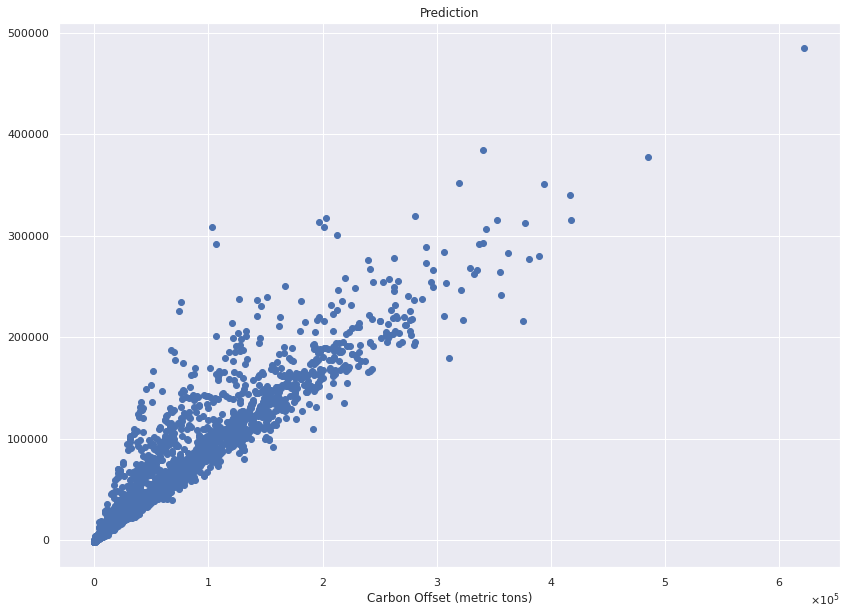

<Figure size 1008x360 with 0 Axes>

In [132]:
predictions = model2.predict(X_test)
plt.figure(figsize=(14,10))
plt.scatter(y_test,predictions)
plt.xlabel('Carbon Offset (metric tons)')
plt.title('Prediction')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
plt.show()
plt.tight_layout()

In [133]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean absolute error: 15903.675624550395
Mean squared error: 710992078.3084433
Root mean squared error: 26664.434708210923
